# Алгоритм K-means

Одним из самых простых и популярных алгоритмов кластеризации является алгоритм _K-means (K-средних)_. Заключается он в следующих шагах:

1. Выбрать количество кластеров $k$, на которые будут делиться данные.


2. Случайным образом выбрать в пространстве данных $k$ точек $c_{k}$ (центроидов) - центров будущих кластеров.


3. Для каждой точки из выборки посчитать, к какому из центроидов она ближе.


4. Переместить каждый центроид в центр выборки, отнесенной к этому центроиду, определив его как среднее арифметическое всех точек кластера:

$$c_{k} = \frac{\sum_{i=1}^{l}[a(x_{i})=k]x_{i}}{\sum_{i=1}^{l}[a(x_{i}) = k]}.$$


5. Повторить шаги 4-5 до сходимости алгоритма (обычно это оценивается по величине смещения центроида после каждого шага - сходимость означает непревышение смещения какого-то заданного значения).

Результат работы алгоритма значительно зависит от начального выбора центроидов. Существует много методик их выбора, наиболее удачным из которых считается k-means++. Он заключается в последовательном выборе начальных приближений так, что вероятность выбрать в качестве центроида следующую точку пропорциональна квадрату расстояния от нее до ближайшего центроида.

![title](clustering.jpg)

Проблемой метода также является необходимость знать число кластеров, на которые будет делиться выборка. В случае, когда это число неизвестно, вариантом ее решения может быть последовательная кластеризация на разное число кластеров (например, от 1 до 10) с последующим анализом качества работы алгоритма, например, по сумме квадратов внутрикластерных расстояний $$\sum_{k=1}^{K}\sum_{i \in C_{k}}\rho(x_{i}, c_{k})^{2}$$ - выбирается такое число кластеров, начиная с которого при увеличении количества кластеров функционал падает незначительно.

### Пример релизации

In [1]:
from sklearn.datasets import make_blobs
import random
import numpy as np
from sklearn import model_selection
import matplotlib.pyplot as plt

In [63]:
from kmeans import kmeans
import metrics

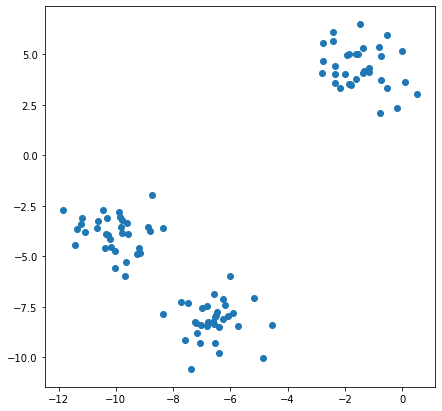

In [4]:
X, y = make_blobs(n_samples=100, random_state=1)
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1]);

In [5]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [24]:
# определим максимальное количество итераций
max_iterations = 50

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

#задаим метрику
metrics = 'euclidean'

In [25]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance, metrics)

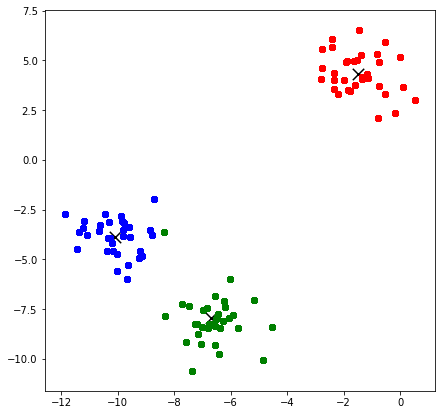

In [23]:
visualize(centroids, clusters)

Оценим качество кластеризации по среднему квадратичному внутриклассовому расстоянию

$$\sum_{k=1}^{K}\frac{1}{|k|}\sum_{i=1}^{l}[a(x_{i})=k]\rho^{2}(x_{i}, c_{k}),$$ где $K$ - количество кластеров, $c_{k}$ - центр кластера.

In [59]:
n_clusters = [i for i in range(1, 11)]

In [66]:
errors = []

for k in n_clusters:
    centroids, clusters = kmeans(X, k, max_iterations, min_distance, metrics='euclidean')
    errors.append(calc_msd(centroids, clusters))

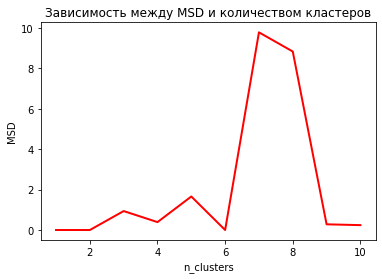

In [85]:
plt.xlabel("n_clusters") # ось абсцисс
plt.ylabel("MSD") # ось ординат
plt.title("Зависимость между MSD и количеством кластеров")
plt.plot(n_clusters, errors, color = 'r', linewidth='2');

Минимум ошибки достигается при 6 кластерах. После 6 кластеров следует взрывной рост ошибки, после чего, начиная с 9 кластера,
ошибка стремится к минимуму. Хороший способ для подбора оптимального количества кластеров.